Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит нам сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Наша задача спланировать кампанию на 2017 год. 

Прежде всего нам нужно взгянуть на датасет. Получим общую информацию.

# Шаг 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from scipy import stats as st
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первый взгляд мы можем сказать о данных следующее:
* Пропусков больше всего в столбцах Critic_Score, User_Score, Rating. Их обязательно нужно изучить и обработать.
* В столбцах Year_of_Release, Critic_Score тип данных не соответствует нужному, его нужно будет изменить на int.
* Также мы видим необходимость привести столбцы к нижнему регистру для удобства.

Мы взгялнули на данные, заметили несоответствия и обозначили нашу дальшейшую работу. Пора приступать к предобработке данных.

# Шаг 2. Предобработка данных

Для начала переименуем столбцы и названия игр, платформ и жанров(чтобы избежать дубликатов).

In [5]:
df.columns = df.columns.str.lower()
for column_name in ["name", "platform", 'genre']:
    df[column_name] = df[column_name].str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь разберёмся с пропусками. Выведем строки столбцов с наибольшим количеством пропусков на экран.

In [7]:
print(df['critic_score'].sample(10))
print(df['user_score'].sample(10))
df['rating'].sample(10)

16435     NaN
6519      NaN
5540      NaN
3273     82.0
12976     NaN
15758     NaN
11256    45.0
9589      NaN
14265     NaN
16676     NaN
Name: critic_score, dtype: float64
9989       6
14296    NaN
1308     8.6
4841     tbd
15087    tbd
15602    8.7
13035    tbd
12127    tbd
5356     5.2
10269    7.5
Name: user_score, dtype: object


9117        T
15108     NaN
11593       E
15954       M
14348     NaN
10271       E
5955     E10+
11700       M
7840        T
12553     NaN
Name: rating, dtype: object

В столбце 'user_score' мы заметили странное значение tbd. Обратившись к интернету, можно найти следующее объяснение: TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть, если у юзера нет достаточно наигранных часов в игре или их количества, то рейтинг невозможно поставить. Поэтому заменим эти заняения на NaN

In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['rating'] = df['rating'].fillna('no_rating')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df['rating'].sample(10)

11765    no_rating
13139            E
9403          E10+
5134             E
10120            E
2688             T
4625             M
3549             T
7305             T
12382    no_rating
Name: rating, dtype: object

Что касается пропусков в столбцах critic_score, user_score, rating, их ничем нельзя заменить. Поскольку рейтинг складывается на каждой платформе по-своему, если мы решим заменить пропуски рейтингов с одного сайта, то рискуем получить недостоверные результаты, ведь от сайта к сайту значения могут сильно отличаться, поэтому пропуски мы их оставим.

В столбце year_of_release пропуски мы попросту удалим, поскольку это малый % от датасета, но очень сильно влияющий в случае некорректного заполнения.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Отлично. Теперь проверим наличие явных дубликатов и удалим их, если таковые есть.

In [12]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Также мы видим, что есть больше количество пропусков в оценках критиков и пользователей, но эти данные нужны далеко не для всех задач проекта, поэтому мы не будем удалять пропущенные значения, а оставим всё как есть.

Теперь изменим тип данных в столбцах, где это требуется. И проверим все изменения.

In [13]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y')
df['critic_score'] = df['critic_score'].astype('float')
df['user_score'] = df['user_score'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           16715 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Теперь наша задача посчитать суммарные продажи во всех регионах и добавить их в отдельный столбцец.

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Отлично! Мы закончили предобработку данных(поменяли типы данных, обработали пропущенные и дублирующиеся значения, оформили столбцы с учётом регистра), теперь можно начинать исследовательский анализ данных.

# Шаг 3. Исследовательский анализ данных

Чтобы иметь общее представление об игровом рынке, посмотрим сколько игр выпускалось в разные годы.

,year_of_release,name
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,36
3,1983-01-01,17
4,1984-01-01,14


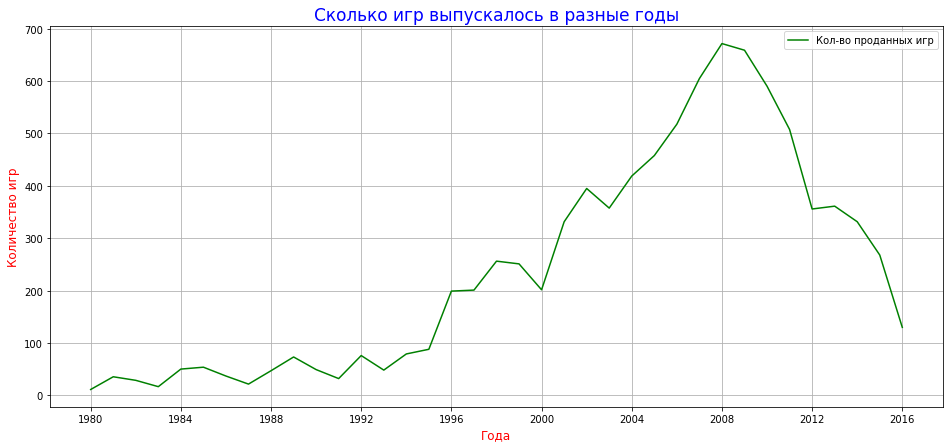

In [17]:
df_sum_games_years = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()
df_sale = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
display(df_sum_games_years.head())
plt.figure(figsize=(16, 7))
plt.plot(df_sale['year_of_release'], df_sale['total_sales'], '-g', label='steelad price');
plt.title('Cколько игр выпускалось в разные годы', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.legend(['Кол-во проданных игр', 'Выпущено наименований'])
plt.grid(True)
plt.show()

Мы видим, что с развитием технологий, игр становится всё больше и больше, а пик наблюдался в 2008 году. 

Теперь посмотрим на то, как менялись продажи игр с течением времени.

In [18]:
df_date = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
display(df_date.head())

,year_of_release,total_sales
0,1980-01-01,11.38
1,1981-01-01,35.68
2,1982-01-01,28.88
3,1983-01-01,16.80
4,1984-01-01,50.35


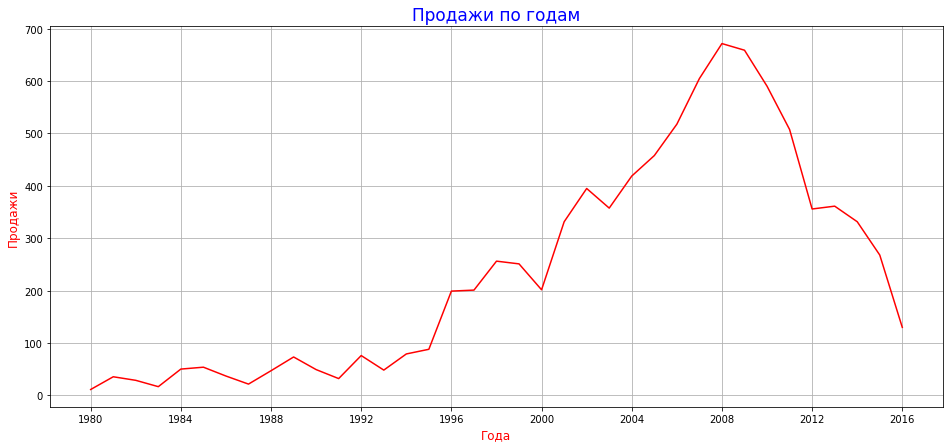

In [19]:
plt.figure(figsize=(16, 7))
plt.plot(df_date['year_of_release'], df_date['total_sales'], '-r');
plt.title('Продажи по годам', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи',fontsize=12, color='red')
plt.grid(True)
plt.show()

Смотря на график, можно увидеть, что самыми информативными будут данные за 2008-2016 года. Так как в это время индустрия активно развивалась и представляла всё больше и больше релизов.

Теперь посмотрим как менялись прожади по платформам с течением времени. 

In [20]:
df_sale_time_exist = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
display(df_sale_time_exist.head())

,platform,year_of_release,total_sales
0,2600,1980-01-01,11.38
1,2600,1981-01-01,35.68
2,2600,1982-01-01,28.88
3,2600,1983-01-01,5.84
4,2600,1984-01-01,0.27


In [21]:
df_sale_platform = pd.pivot_table(df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(df_sale_platform.head())

platform,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,...,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980-01-01,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализируем распределение продаж по платформам с помощью heatmap.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

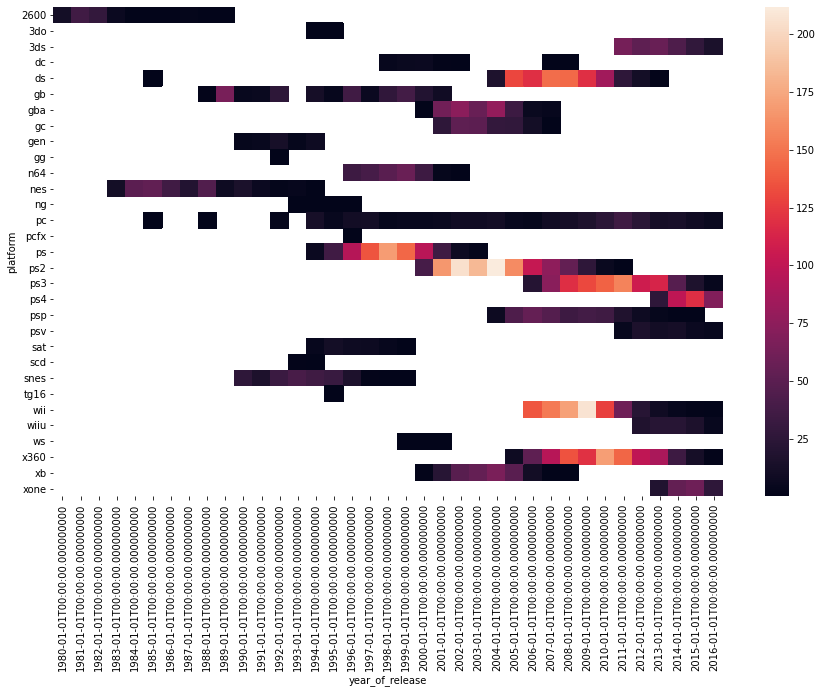

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(df_sale_platform.T)

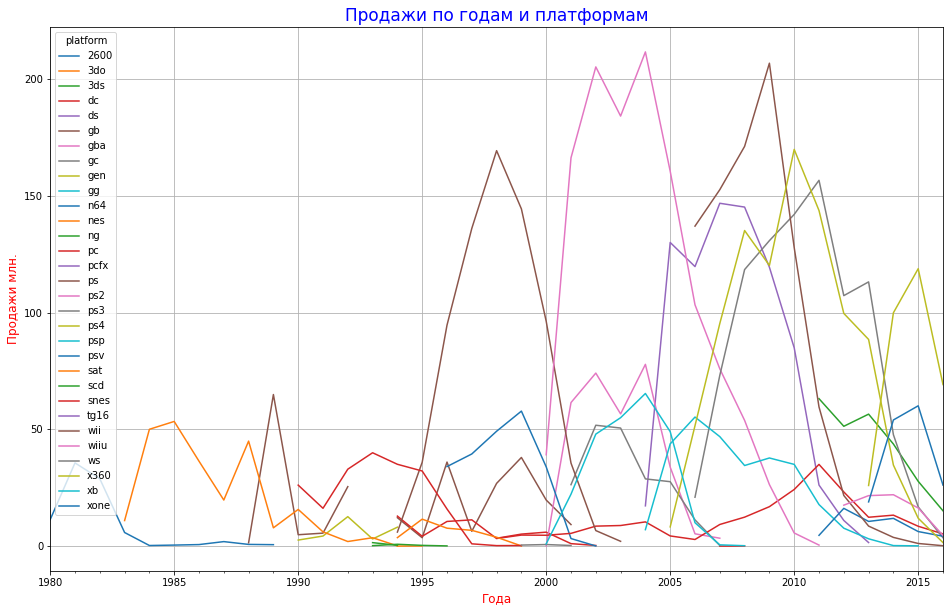

In [23]:
df_sale_platform.plot(figsize=(16,10))
plt.grid(True)
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи млн.',fontsize=12, color='red')
plt.title('Продажи по годам и платформам', fontsize=17, color='blue')
plt.show()

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [24]:
df_more_sale_platform = pd.pivot_table(df, index='platform',values='total_sales', aggfunc='sum')
display(df_more_sale_platform.sort_values(by='total_sales', ascending=False).head(11))

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


Сформируем таблицу, куда входят топ-10 плафторм по выручке с продаж и построим график распределения.

In [25]:
df_top10 = (df[((df['platform'] == 'ps2') | (df['platform'] == 'x360') | (df['platform'] == 'ps3') 
               | (df['platform'] == 'wii') | (df['platform'] == 'ds') | (df['platform'] == 'ps')
              | (df['platform'] == 'ps4') | (df['platform'] == 'gba') | (df['platform'] == 'psp')
              | (df['platform'] == '3ds')) & (df['year_of_release'] > '1990-01-01')])
display(df_top10.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


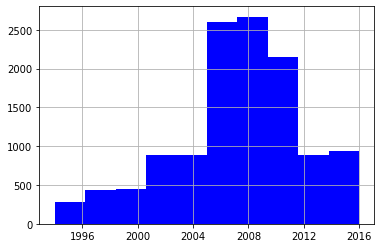

In [26]:
df_top10['year_of_release'].hist(color='b');

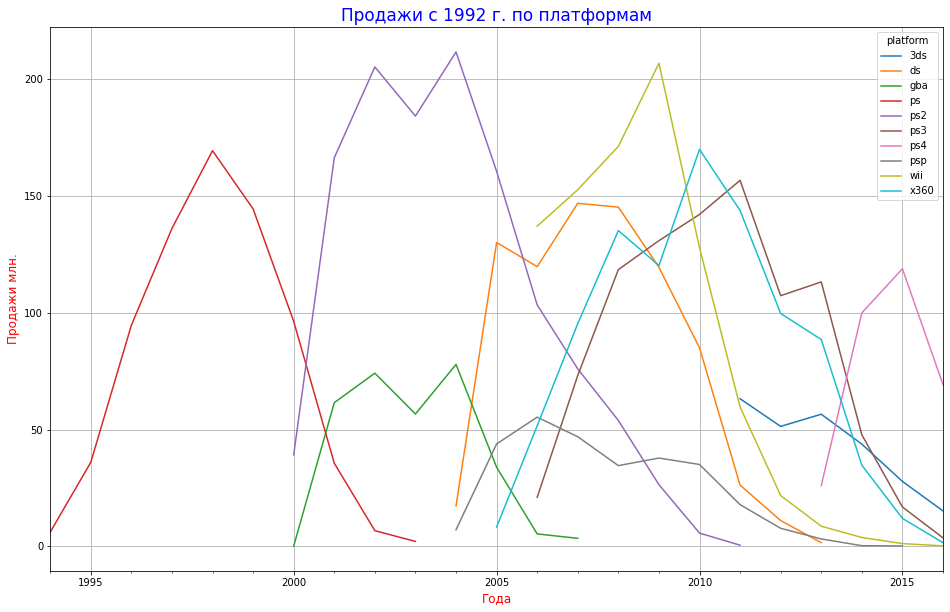

In [27]:
pd.pivot_table(df_top10 , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,10))
plt.grid(True)
plt.title('Продажи с 1992 г. по платформам', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи млн.',fontsize=12, color='red')
plt.show()

Теперь узнаем, за какой срок появляются и исчезают платформы, да и в целом, сколько же они существуют?

In [28]:
arr_platform = []
arr_exist = []
for i in df_sale_platform.columns:
    arr_platform.append(i)
    arr_exist.append(df_sale_platform[i].count())
dict_platform = {"Platform": arr_platform, 'Years_exist':arr_exist}
df_sale_time_exist = pd.DataFrame(dict_platform)

display(df_sale_time_exist.sort_values(by='Years_exist', ascending=False).head(15))

,Platform,Years_exist
13,pc,26
5,gb,13
11,nes,12
28,x360,12
19,psp,12
16,ps2,12
25,wii,11
4,ds,11
17,ps3,11
0,2600,10


In [29]:
df_sale_time_exist['Years_exist'].describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: Years_exist, dtype: float64

Из наших данных мы видим, что срок за который появляются новые и исчезают старые платформы ориентировочно 10-12 лет, а средний срок жизни будет равен 7 годам.

Теперь возьмем данные за соответствующий актуальный период. Актуальный период определим с 2008 по 2016 года. Эти данные будут самыми информативными.

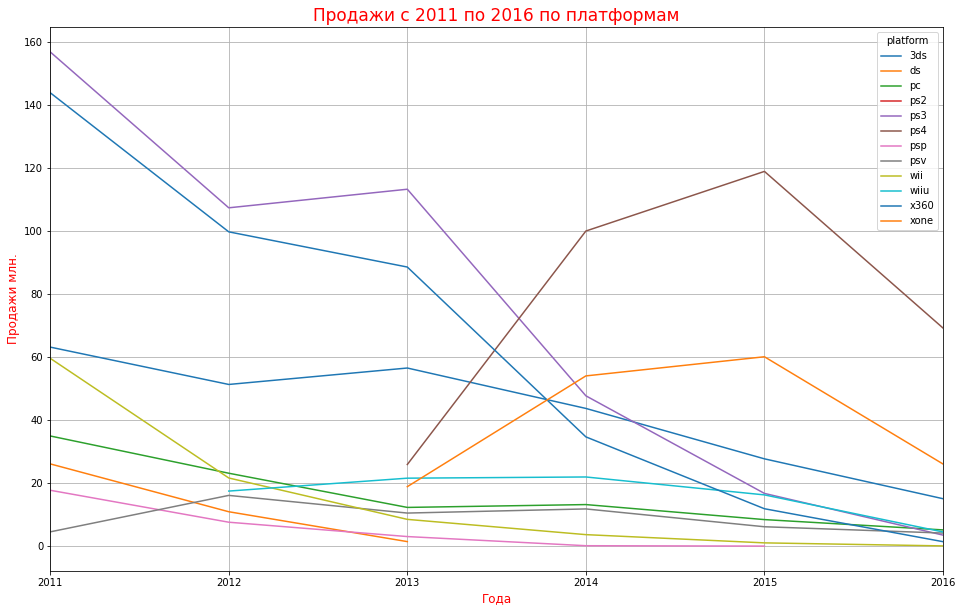

In [30]:
df_with_2011 = (df[df['year_of_release'] >='2011-01-01'])
pd.pivot_table(df_with_2011, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,10))
plt.grid(True)
plt.title('Продажи с 2011 по 2016 по платформам', fontsize=17, color='red')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи млн.',fontsize=12, color='red')
plt.show()

Теперь посмотрим какие платформы лидируют по продажам, растут или падают? А также выберем несколько потенциально прибыльных платформ.

In [31]:
df_sale_with_2011 = df_with_2011.groupby(['platform']).agg({'total_sales':'sum'})
display(df_sale_with_2011.sort_values(by='total_sales', ascending=False).head(15))

,total_sales
platform,
ps3,445.57
x360,380.38
ps4,314.14
3ds,257.81
xone,159.32
pc,97.68
wii,95.02
wiiu,82.19
psv,53.81


In [32]:
df_sale_with_2011_v2 = (pd.pivot_table(df_with_2011 , index='platform',
                                       columns='year_of_release', values='total_sales', aggfunc='sum').reset_index())
display(df_sale_with_2011_v2)

year_of_release,platform,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
0,3ds,63.20,51.36,56.57,43.76,27.78,15.14
1,ds,26.18,11.01,1.54,NaN,NaN,NaN
2,pc,35.03,23.22,12.38,13.28,8.52,5.25
3,ps2,0.45,NaN,NaN,NaN,NaN,NaN
4,ps3,156.78,107.36,113.25,47.76,16.82,3.60
5,ps4,NaN,NaN,25.99,100.00,118.90,69.25
6,psp,17.82,7.69,3.14,0.24,0.12,NaN
7,psv,4.63,16.19,10.59,11.90,6.25,4.25
8,wii,59.65,21.71,8.59,3.75,1.14,0.18
9,wiiu,NaN,17.56,21.65,22.03,16.35,4.60


Из данных видно, что по наибольшему количеству продаж и соответствено наибольшей прибыльности можем выделить следующие платформы: ps3, x360, wii, ds, ps4, 3ds. Также можно отметить, что стремительно развиваются мобильные платформы, что сказывается на продажах на всех остальных платформах.

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [33]:
print('Глобальные продажи по платформам с 2011 по 2016 год')
df_sale_with_2011_sum = df_with_2011.groupby(['platform']).agg({'total_sales':'sum'}).reset_index()
display(df_sale_with_2011_sum.reset_index().sort_values(by='total_sales', ascending=False))

print('Средние продажи по платформам с 2011 по 2016 год')
df_sale_with_2011_mean = df_with_2011.groupby(['platform']).agg({'total_sales':'mean'}).reset_index()
df_sale_with_2011_mean = df_sale_with_2011_mean.rename(columns={"total_sales": "mean"})
display(df_sale_with_2011_mean.reset_index().sort_values(by='mean', ascending=False))



Глобальные продажи по платформам с 2011 по 2016 год


,index,platform,total_sales
4,4,ps3,445.57
10,10,x360,380.38
5,5,ps4,314.14
0,0,3ds,257.81
11,11,xone,159.32
2,2,pc,97.68
8,8,wii,95.02
9,9,wiiu,82.19
7,7,psv,53.81
1,1,ds,38.73


Средние продажи по платформам с 2011 по 2016 год


,index,platform,mean
5,5,ps4,0.801378
10,10,x360,0.763815
11,11,xone,0.645020
4,4,ps3,0.629336
9,9,wiiu,0.559116
0,0,3ds,0.503535
8,8,wii,0.482335
2,2,pc,0.251105
1,1,ds,0.210489
7,7,psv,0.125431


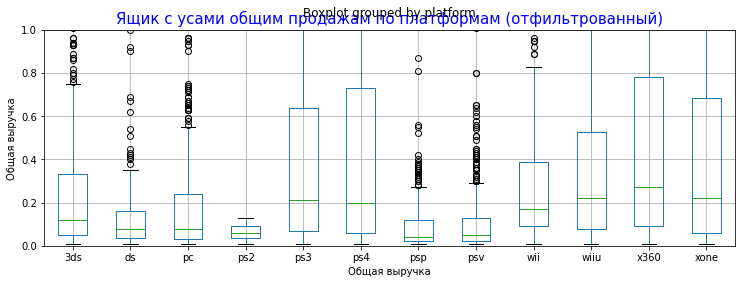

In [34]:
df_with_2011.boxplot('total_sales', by = 'platform', figsize=(12,4))

plt.title('Ящик с усами общим продажам по платформам (отфильтрованный)', fontsize=15, color='blue')
plt.xlabel('Общая выручка')
plt.ylabel('Общая выручка')
plt.ylim(0, 1)
plt.show()

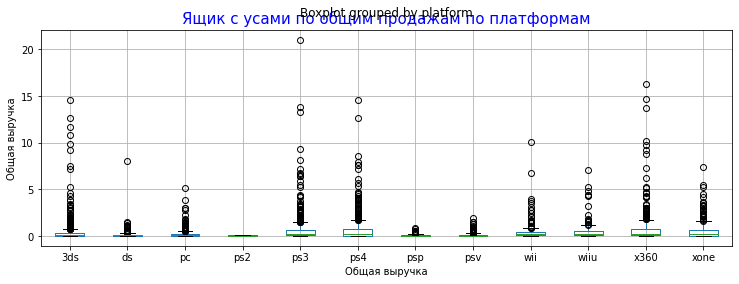

In [35]:
df_with_2011.boxplot('total_sales', by = 'platform', figsize=(12,4))

plt.title('Ящик с усами по общим продажам по платформам', fontsize=15, color='blue')
plt.xlabel('Общая выручка')
plt.ylabel('Общая выручка')
plt.show()

In [36]:
df_sale_with_2011_sum['total_sales'].describe()

count     12.000000
mean     162.842500
std      149.576645
min        0.450000
25%       50.040000
50%       96.350000
75%      271.892500
max      445.570000
Name: total_sales, dtype: float64

Какие выводы мы можем сделать из полученных данных?
* Данные по глобальным продажам игр в разбивке по платформам очень разбросанные, практически все самые прибыльные проекты с высокой выручкой находяться вне пределов усов в зоне выбросов
* Разница в средних продажах тоже большая
* Первая тройка платформ лидирует с очень большим отрывом

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [37]:
df_ps4 = df_with_2011[df_with_2011['platform'] == 'ps4']
display(df_ps4.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015-01-01,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,ps4,2014-01-01,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,ps4,2015-01-01,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015-01-01,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
92,call of duty: advanced warfare,ps4,2014-01-01,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [38]:
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             392 non-null    object        
 1   platform         392 non-null    object        
 2   year_of_release  392 non-null    datetime64[ns]
 3   genre            392 non-null    object        
 4   na_sales         392 non-null    float64       
 5   eu_sales         392 non-null    float64       
 6   jp_sales         392 non-null    float64       
 7   other_sales      392 non-null    float64       
 8   critic_score     252 non-null    float64       
 9   user_score       257 non-null    float64       
 10  rating           392 non-null    object        
 11  total_sales      392 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 39.8+ KB


In [39]:
df_ps4_scatter_matrix =df_ps4[['total_sales', 'critic_score', 'user_score']]
display(df_ps4_scatter_matrix.head())

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


Платформа PS4
              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000

Платформа PS4


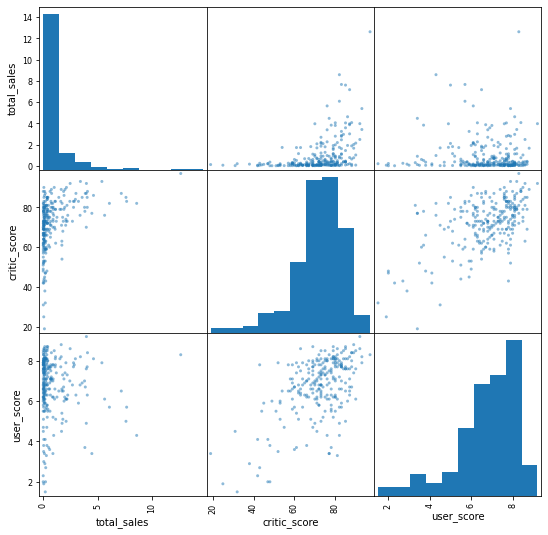

In [40]:
print('Платформа PS4')
print(df_ps4_scatter_matrix.corr())
print()
print('Платформа PS4')
pd.plotting.scatter_matrix(df_ps4_scatter_matrix, figsize=(9, 9), grid=True);

Мы видим, что есть две корреляции. Какие выводы можно сделать?
* видно что есть корреляция между рейтингом пользователей и критиков
* между оценками юзеров и уровнем продаж значимой корреляции нет
* между оценками критиков и продажами есть слабая корреляция

Соотнесем выводы с продажами игр на других платформах.


Платформа XOne
              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000


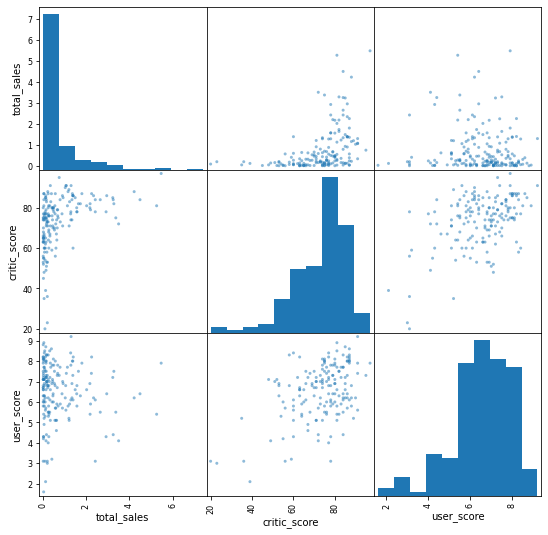

In [41]:
df_xone = df_with_2011.query('platform == "xone"')[['total_sales', 'critic_score', 'user_score']]
print()
print('Платформа XOne')
pd.plotting.scatter_matrix(df_xone, figsize=(9, 9), grid=True);
print(df_xone.corr())


Платформа X360
              total_sales  critic_score  user_score
total_sales      1.000000      0.391253    0.038918
critic_score     0.391253      1.000000    0.568386
user_score       0.038918      0.568386    1.000000


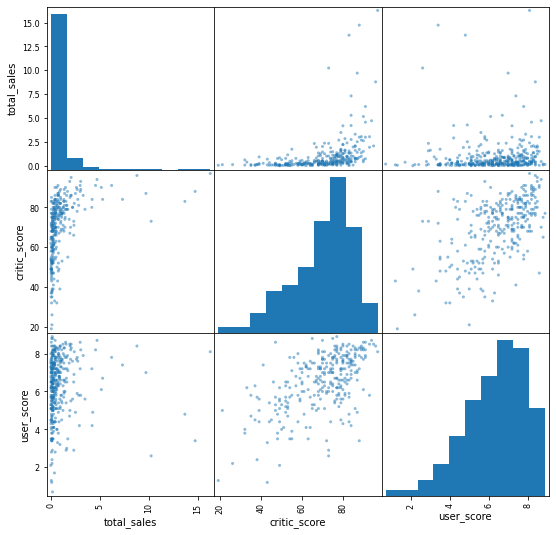

In [42]:
df_x360 = df_with_2011.query('platform == "x360"')[['total_sales', 'critic_score', 'user_score']]
print()
print('Платформа X360')
pd.plotting.scatter_matrix(df_x360, figsize=(9, 9), grid=True);
print(df_x360.corr())

Проанализировав и сравнив данные, мы видим, что результаты получаются аналогичные.

Теперь посмотрим на общее распределение игр по жанрам и выручке. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Общее распределение игр по жанрам и выручке.

In [43]:
df_with_2011['genre'].value_counts()

action          1269
role-playing     465
adventure        410
sports           389
misc             375
shooter          329
racing           180
fighting         159
simulation       136
platform         122
strategy         117
puzzle            71
Name: genre, dtype: int64

In [44]:
df_genre_reting = (df_with_2011.groupby(['genre']).agg({'total_sales':'sum', 'name':'count'})
                   .sort_values(by='total_sales', ascending=False))
df_genre_reting = df_genre_reting.rename(columns={'name':'name_count'})
df_genre_reting = df_genre_reting.reset_index()
display(df_genre_reting)

,genre,total_sales,name_count
0,action,557.80,1269
1,shooter,402.91,329
2,role-playing,245.63,465
3,sports,237.15,389
4,misc,139.42,375
5,platform,88.68,122
6,racing,88.31,180
7,fighting,66.90,159
8,simulation,50.26,136
9,adventure,45.04,410


Рассчитаем, сколько продавался один релиз каждого жанра выше.

In [45]:
df_genre_reting['total_sales_millon'] = (df_genre_reting['total_sales']*1000000)//1
df_genre_reting['profit_one_box'] = (df_genre_reting['total_sales_millon']/df_genre_reting['name_count'])//1
display(df_genre_reting.head())

,genre,total_sales,name_count,total_sales_millon,profit_one_box
0,action,557.80,1269,557799999.0,439558.0
1,shooter,402.91,329,402909999.0,1224650.0
2,role-playing,245.63,465,245630000.0,528236.0
3,sports,237.15,389,237150000.0,609640.0
4,misc,139.42,375,139420000.0,371786.0


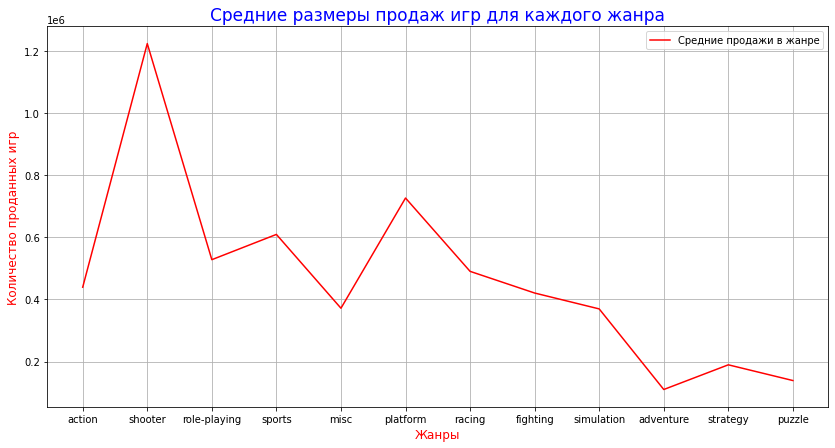

In [46]:

plt.figure(figsize=(14, 7))
plt.plot(df_genre_reting['genre'], df_genre_reting['profit_one_box'], '-r', label='steel price');
plt.title('Cредние размеры продаж игр для каждого жанра', fontsize=17, color='blue')
plt.xlabel('Жанры',fontsize=12, color='red')
plt.ylabel('Количество проданных игр',fontsize=12, color='red')
plt.legend(['Средние продажи в жанре', 'Кол-во изданных игр в жанре'])
plt.grid(True)
plt.show()

Из наиболее прибыльных жанров можно выделить следующие:

In [47]:
display(df_genre_reting.head())

,genre,total_sales,name_count,total_sales_millon,profit_one_box
0,action,557.80,1269,557799999.0,439558.0
1,shooter,402.91,329,402909999.0,1224650.0
2,role-playing,245.63,465,245630000.0,528236.0
3,sports,237.15,389,237150000.0,609640.0
4,misc,139.42,375,139420000.0,371786.0


Вы видим, что жанр action самый популярный. Почему? Потому что он наиболее прост в освоении игроками, также как sport и shooter. Чем проще освоить жанр, тем больше людей будут в него играть, вне зависимости от игры, отсюда и такая популярность. 

# Шаг 4. Портрет пользователя каждого региона

Чтобы составить портрет пользователя для каждого региона(NA, EU, JP), нам нужно проанализировать следующие параметры:
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5).


А также нам важно узнать влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнем с самых популярных платформ(топ-5). Опишем разницу в долях продаж.

In [48]:
df_user_na_platform = df_with_2011.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('ТОП5 Северной Америки')
display(df_user_na_platform)

df_user_eu_platform = df_with_2011.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('ТОП5 Европы')
display(df_user_eu_platform)

df_user_jp_platform = df_with_2011.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('ТОП5 Японии')
display(df_user_jp_platform.head(5))

ТОП5 Северной Америки


,platform,na_sales
10,x360,226.80
4,ps3,168.26
5,ps4,108.74
11,xone,93.12
0,3ds,82.65


ТОП5 Европы


,platform,eu_sales
4,ps3,163.10
5,ps4,141.09
10,x360,117.10
0,3ds,61.27
2,pc,56.70


ТОП5 Японии


,platform,jp_sales
0,3ds,100.62
4,ps3,49.39
6,psp,24.04
7,psv,21.84
5,ps4,15.96


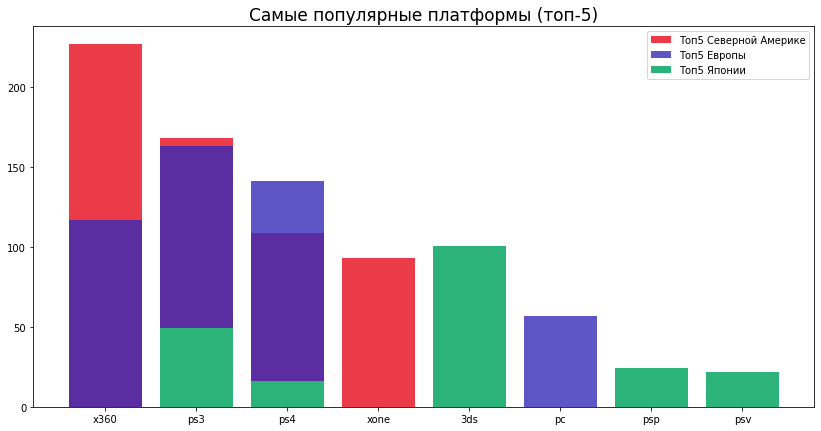

In [49]:
plt.figure(figsize=(14, 7))
plt.bar(df_user_na_platform['platform'], df_user_na_platform['na_sales'], color=(0.9, 0.04, 0.1, 0.8))
plt.bar(df_user_eu_platform['platform'], df_user_eu_platform['eu_sales'], color=(0.21, 0.17, 0.72, 0.8))
plt.bar(df_user_jp_platform['platform'], df_user_jp_platform['jp_sales'], color=(0.17, 0.7, 0.48, 1))
plt.title('Самые популярные платформы (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ5 Северной Америке', 'Топ5 Европы', 'Топ5 Японии'])
plt.show()

Мы видим, что в Северной Америке и Европе лидируют х360, при чём с большим отрывом от всех остальных платформ, в Европе также ps3 и ps4 очень популярны, но xone также держится на плаву и занимает хорошую часть рынка в UA. В Японии самыми популярными являются платформы ps(кроме 4) и японские платформы, такие как wiiu и 3ds.

Самые популярные жанры(топ-5)

In [50]:
df_user_na_genre = df_with_2011.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('ТОП5 Северной Америки')
display(df_user_na_genre.head(5))

df_user_eu_genre = df_with_2011.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('ТОП5 Европы')
display(df_user_eu_genre.head(5))

df_user_jp_genre = df_with_2011.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('ТОП5 Японии')
display(df_user_jp_genre.head(5))

ТОП5 Северной Америки


,genre,na_sales
0,action,230.92
8,shooter,194.43
10,sports,108.70
7,role-playing,83.78
3,misc,69.69


ТОП5 Европы


,genre,eu_sales
0,action,199.12
8,shooter,148.02
10,sports,88.48
7,role-playing,62.30
6,racing,40.58


ТОП5 Японии


,genre,jp_sales
7,role-playing,79.87
0,action,63.62
3,misc,17.60
2,fighting,12.38
4,platform,12.13


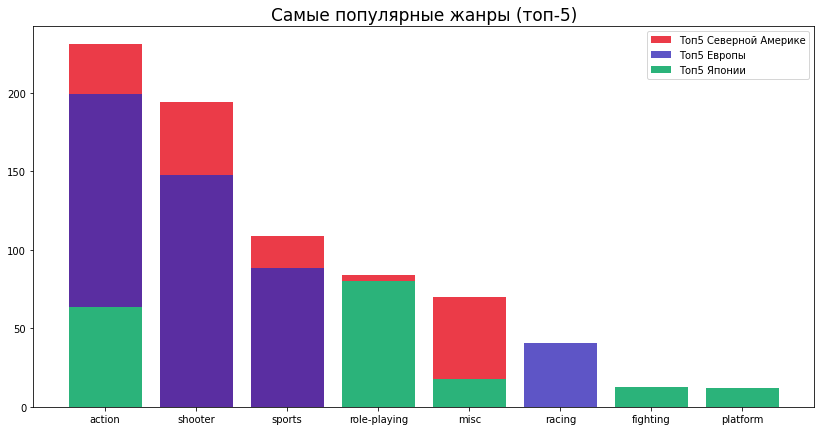

In [51]:
plt.figure(figsize=(14, 7))
plt.bar(df_user_na_genre['genre'], df_user_na_genre['na_sales'], color=(0.9, 0.04, 0.1, 0.8))
plt.bar(df_user_eu_genre['genre'], df_user_eu_genre['eu_sales'], color=(0.21, 0.17, 0.72, 0.8))
plt.bar(df_user_jp_genre['genre'], df_user_jp_genre['jp_sales'], color=(0.17, 0.7, 0.48, 1))
plt.title('Самые популярные жанры (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ5 Северной Америке', 'Топ5 Европы', 'Топ5 Японии'])
plt.show()

Что же мы видим здесь? Жители UA и EU фанатеют от жанров action, sports, shooter в равных долях. Также отдельно в EU предпочитают racing, а в UA misc. В Японии же немного другая картина. Они почти не интересуются жанрами sports и misc, но зато мы видим, что жанры role-playing, fighting и platform имеют у них большую популярность, чем во всех остальных странах. Скорее всего это связано с изначальной культурой игр на Востоке. Они более требовательны к разработке и не любят классические "стрелялки" и тп, больший интерес у них вызывают как раз rp игры и платформеры, где нужно поразмыслить и вникнуть в историю, а что касается файтингов, достаточно вспомнить мортал комбат и всё встанет на свои места.

Теперь пришло время узнать влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала посмотрим, какие бывают рейтинги и что они значат.

1. «EC» («Early childhood») — «Для детей младшего возраста»:
2. «E» («Everyone») — «Для всех»
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
4. «T» («Teen») — «Подросткам»
5. «M» («Mature») — «Для взрослых»
6. «AO» («Adults Only 18+») — «Только для взрослых»
7. "K-A" for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E.

Теперь рассчитаем топ рейтингов

In [52]:
df_user_na_ESRB = df_with_2011.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('ТОП5 Северной Америки')
display(df_user_na_ESRB)

df_user_eu_ESRB = df_with_2011.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('ТОП5 Европы')
display(df_user_eu_ESRB)

df_user_jp_ESRB = df_with_2011.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('ТОП5 Японии')
display(df_user_jp_ESRB)

ТОП5 Северной Америки


,rating,na_sales
3,M,308.45
0,E,170.17
6,no_rating,123.69
1,E10+,117.72
5,T,109.31


ТОП5 Европы


,rating,eu_sales
3,M,250.26
0,E,141.73
6,no_rating,116.61
5,T,83.16
1,E10+,78.00


ТОП5 Японии


,rating,jp_sales
6,no_rating,138.21
0,E,36.68
5,T,33.39
3,M,26.14
1,E10+,11.23


При анализе рейтингов можно сказать, что в каждом отдельном регионе рейтинг ESRB на продажи практически не влияет. Лидерами продаж в регионах являются игры с одинаковыми рейтингами, чем доступнее широким массам рейтинг, тем больше продаж будет у игры. Самый популярный рейтинг - это «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых». Также стоит отметить, что по популярности мета стабильно занимают игры без рейтинга. Обратившись к интрнету, можно найти следующее объяснение: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. Можно сделать вывод, что во всех странах популярны те или иные новые игры, которых не было раньше, которые вот-вот вышли, неизвестность рождает интерес, всё логично!

# Шаг 5. Провека гипотез

Пришло время проверить гипотезы. Всего у нас имеются две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные. 

Будем разбираться с ними по порядку, начнём с первой.

In [53]:
print('Средний пользовательский рейтинг  Xbox One = ', round(df_with_2011.query('platform == "x360"')['user_score'].mean(), 2))
print('Средний пользовательский рейтинг        PC = ', round(df_with_2011.query('platform == "pc"')['user_score'].mean(), 2))

Средний пользовательский рейтинг  Xbox One =  6.33
Средний пользовательский рейтинг        PC =  6.45


Поскольку наша задача проверить равенстно или неравенство двух значений, без указания в отличий в меньшую или большую сторону, мы будем использовать двустороннюю гипотезу на всей генеральной совокупности. Разберём Н0 и Н1:
- Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны;
- Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны;

In [54]:
df_hip_1 = df_with_2011[df_with_2011['user_score'] >= 0] 
#создаем отдельный дф, поскольку NaN не были удалены из общего дф, что искожало бы результаты

In [55]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    df_hip_1.query('platform == "x360"')['user_score'], 
    df_hip_1.query('platform == "pc"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3283822659693548
Не получилось отвергнуть нулевую гипотезу


На основе рассчётов мы не отвергаем нулевую гипотезу и придерживаемся её, а также делаем вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC равны;

Переходим к следующей гипотезе "Средние пользовательские рейтинги жанров Action и Sports разные"

Чтобы проверить гипотезу о равенстве мы делаем статистический тест (t-test) на всей генеральной совокупности. Разберём Н0 и Н1:

- Н0 - Средние пользовательские рейтинги жанров Action и Sports равны;
- Н1 - Средние пользовательские рейтинги жанров Action и Sports не равны;

In [56]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    df_hip_1.query('genre == "action"')['user_score'], 
    df_hip_1.query('genre == "sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Как мы видим, у нас получилось отвергунть нулевую гипотезу. Это значит, что мы делаем вывод о том, что средние пользовательские рейтинги жанров Action и Sports не равны;

# Шаг 6. Oбщий вывод

Мы провели огромную работу в анализе рынка игровой индустрии. Прежде всего мы обработали наши данные, отчистили их, оформили так, чтобы с ними было удобно работать и управлять ими, а затем приступили к анализу и исследованиям. 

Мы провели несколько этапов:
- исследовательский анализ данных: мы узнали сколько игр в какие года выпускались, какие были популярнее, какие платформы и жанры заняли рынок игровой индустрии, а самое главное, мы увидели, какие платформы и игры имеют наибольшую популярность, это поможет нам в дальнейшем продвижении нашего проекта и планировании кампаний на следующий год.
- мы составили портрет для каждого региона: мы узнали какие жанры и платформы лидируют в странах. Можно сказать, что самыми популярными платформами остаются PS, они встречаются в каждом изученом регионе, также лидирующие позиции в каждой стране занимают локальные платформы(у Японии это nintendo, а у Европы и Америки это PS). Также мы выяснили, что наиболее популярными жанрами являются action и sport, вне зависимости региона(но вместе с тем в Японии лидирует жанр RP). Также мы обнаружили, что самый популярный рейтинг в любом регионе - это Е, то есть "для всех". 
- и наконец мы проверили две двусторонние гипотезы: выяснив, что Средние пользовательские рейтинги платформ Xbox One и PC не равны и Средние пользовательские рейтинги жанров Action и Sports равны; 

Большая работа окончена, все выводы и данные получены, теперь можно переходить к планированию кампаний на следующий год, но это уже совсем другая история...